# End to End MNIST notebook

In [42]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, Model, Sequential, utils
import matplotlib.pyplot as plt

%matplotlib inline

In [43]:
# Train and Test dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1, 28*28)
x_train = x_train.astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train , num_classes=10)

print([i.shape for i in (x_train, y_train, x_test, y_test)])

[(60000, 784), (60000, 10), (10000, 28, 28), (10000,)]


In [44]:
### SEQUENTIAL API
model = Sequential()
model.add(layers.Dense(64, input_dim=784, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [45]:
### FUNCTIONAL API

inp = layers.Input((784,))
x = layers.Dense(64, activation='relu')(inp)
out = layers.Dense(10, activation='softmax')(x)

model = Model(inp, out)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


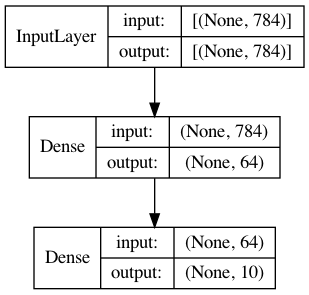

In [46]:
utils.plot_model(model, show_layer_names=False, show_shapes=True)

In [47]:
# COMPILE AND TRAIN
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, 
                    batch_size=200, 
                    epochs=5)

Epoch 1/5
300/300 [==============================] - 1s 1ms/step - loss: 0.8549 - accuracy: 0.7552
Epoch 2/5
300/300 [==============================] - 0s 1ms/step - loss: 0.2474 - accuracy: 0.9304
Epoch 3/5
300/300 [==============================] - 0s 1ms/step - loss: 0.1894 - accuracy: 0.9448
Epoch 4/5
300/300 [==============================] - 0s 1ms/step - loss: 0.1502 - accuracy: 0.9567
Epoch 5/5
300/300 [==============================] - 0s 1ms/step - loss: 0.1282 - accuracy: 0.9636


In [48]:
# EVALUATION

# get predictions
y_pred = model.predict(x_train)

# compute confusion matrix with `tf` 
confusion = tf.math.confusion_matrix(
              labels = np.argmax(y_train, axis=1),      # get trule labels 
              predictions = np.argmax(y_pred, axis=1))  # get predicted labels

pd.DataFrame(confusion.numpy())

,0,1,2,3,4,5,6,7,8,9
0,5846,0,8,5,4,4,18,4,32,2
1,1,6651,31,14,6,0,0,9,26,4
2,19,17,5767,25,30,3,10,42,39,6
3,11,21,68,5835,1,39,1,29,108,18
4,9,18,17,1,5662,0,14,9,17,95
5,35,13,13,78,15,5069,44,7,118,29
6,32,19,7,3,13,9,5799,0,36,0
7,13,25,29,6,23,7,2,6095,8,57
8,22,51,14,51,8,9,12,10,5657,17
9,22,18,2,45,79,9,1,59,54,5660


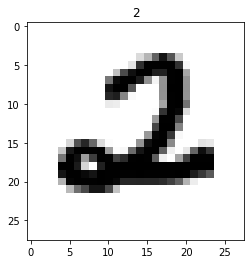

In [51]:
# EVALUATION

predictions = model.predict(x_train)

n = np.random.randint(0,60000)
plt.imshow(x_train[n].reshape(28, 28), cmap=plt.cm.binary)
plt.title(np.argmax(predictions[n], axis=0))
plt.show()